# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

For this project, I'm exploring the relationship between CO2 emissions and average temperature on a per country basis per year. More specifically, I'll be looking at the world's two largest GDPs, USA and China. Is there a positive correlation between the two metrics, as CO2 emissions increase, does the temperature as well?

One dataset is from Berkeley Earth and contains Earth's temperatures for most of the world's countries and the other dataset is from World Bank and contains various climate change data, including CO2 emissions, per country/per year. The two datasets will be combined and after do, I'll hone in on USA and China. 

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [1]:
#import libraries used to throughout the project
import pandas as pd
import numpy as np
import requests
import opendatasets as od #required to use kaggle api
import xlrd #need to read excel file
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

#### **Dataset 1**

Type: .csv file 
* ### **Note**: I didn't realize this dataset was under 500 rows until I did all the work to gather it. I included the wrangling of this data, but it was NOT used in the project.

Method: Web Scraping using BeautifulSoup

Dataset variables:

*   Year: The year
*   CO2: Carbon Dioxide
*   CH4: Methane
*   N20: Nitrous Oxide
*   CFC: Chlorofluorocarbons
*   HCFC: Hydrochlorofluorocarbons
*   HFC: Hydrofluorocarbons

In [2]:
#grab data
url = 'https://gml.noaa.gov/aggi/aggi.html#:~:text=The%20Annual%20Greenhouse%20Gas%20Index,Scientific%20Assessment%20of%20Climate%20Change'
r = requests.get(url)
#confirm all is good
print(r.status_code)

200


In [3]:
#view data
data = r.text
print(data)



<!DOCTYPE html>
<html lang="en">
  <head>

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"> 
    <meta name="DC.language" content="EN-US" >
    <meta name="DC.creator" content="US Department of Commerce, NOAA, Global Monitoring Laboratory" >

    
    <meta name="DC.date.created"  content="2005-10-01" >
    <meta name="DC.date.reviewed" content="2022-05-23" >


    <meta name="keywords" content="noaa, national oceanic and atmospheric administration, earth system research, esrl, gml, gmd, climate, air quality, numerical modeling, global warming, climate change, ozone, co2, aerosols">


    <meta name="description" content="The Global Monitoring Laboratory conducts research on greenhouse gas and carbon cycle feedbacks, changes in clouds, aerosols, and surface radiation, and recovery of stratospheric ozone. ">
    <meta name="DC.description" content="The Global Monitoring Laboratory conduct

In [4]:
#parse html with beautifulsoup and visually locate needed table (Global Radiative Forcing)
soup_data = BeautifulSoup(data, 'html.parser')
print(soup_data)


<!DOCTYPE html>

<html lang="en">
<head>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="EN-US" name="DC.language"/>
<meta content="US Department of Commerce, NOAA, Global Monitoring Laboratory" name="DC.creator"/>
<meta content="2005-10-01" name="DC.date.created"/>
<meta content="2022-05-23" name="DC.date.reviewed"/>
<meta content="noaa, national oceanic and atmospheric administration, earth system research, esrl, gml, gmd, climate, air quality, numerical modeling, global warming, climate change, ozone, co2, aerosols" name="keywords"/>
<meta content="The Global Monitoring Laboratory conducts research on greenhouse gas and carbon cycle feedbacks, changes in clouds, aerosols, and surface radiation, and recovery of stratospheric ozone. " name="description"/>
<meta content="The Global Monitoring Laboratory conducts research on greenhouse gas and carbon cycle feedbacks, changes in c

In [5]:
#get table and view
table = soup_data.find('table', class_='table table-bordered table-condensed table-striped table-header')
print(table)

<table class="table table-bordered table-condensed table-striped table-header">
<thead>
<tr>
<th colspan="8">Global Radiative Forcing (W m<sup>-2</sup>)</th>
<th>CO<sub>2</sub>-eq<br/>(ppm)</th>
<th colspan="2">AGGI</th>
</tr>
<tr>
<th>Year</th>
<th>CO<sub>2</sub></th>
<th>CH<sub>4</sub></th>
<th>N<sub>2</sub>O</th>
<th>CFCs*</th>
<th>HCFCs</th>
<th>HFCs*</th>
<th>Total</th>
<th>Total</th>
<th>1990 = 1</th>
<th>% change *</th>
</tr>
</thead>
<tbody>
<tr>
<td>1979</td>
<td>1.025</td>
<td>0.500</td>
<td>0.088</td>
<td>0.175</td>
<td>0.008</td>
<td>0.001</td>
<td>1.798</td>
<td>388</td>
<td>0.787</td>
<td></td>
</tr>
<tr>
<td>1980</td>
<td>1.058</td>
<td>0.509</td>
<td>0.088</td>
<td>0.185</td>
<td>0.009</td>
<td>0.001</td>
<td>1.850</td>
<td>392</td>
<td>0.810</td>
<td>2.3</td>
</tr>
<tr>
<td>1981</td>
<td>1.076</td>
<td>0.517</td>
<td>0.091</td>
<td>0.195</td>
<td>0.010</td>
<td>0.001</td>
<td>1.890</td>
<td>395</td>
<td>0.827</td>
<td>1.8</td>
</tr>
<tr>
<td>1982</td>
<td>1.088</td>
<t

In [6]:
#get all rows and view
for i in table.find_all('tbody'):
    rows = i.find_all('tr')
print(rows)

[<tr>
<td>1979</td>
<td>1.025</td>
<td>0.500</td>
<td>0.088</td>
<td>0.175</td>
<td>0.008</td>
<td>0.001</td>
<td>1.798</td>
<td>388</td>
<td>0.787</td>
<td></td>
</tr>, <tr>
<td>1980</td>
<td>1.058</td>
<td>0.509</td>
<td>0.088</td>
<td>0.185</td>
<td>0.009</td>
<td>0.001</td>
<td>1.850</td>
<td>392</td>
<td>0.810</td>
<td>2.3</td>
</tr>, <tr>
<td>1981</td>
<td>1.076</td>
<td>0.517</td>
<td>0.091</td>
<td>0.195</td>
<td>0.010</td>
<td>0.001</td>
<td>1.890</td>
<td>395</td>
<td>0.827</td>
<td>1.8</td>
</tr>, <tr>
<td>1982</td>
<td>1.088</td>
<td>0.525</td>
<td>0.095</td>
<td>0.205</td>
<td>0.011</td>
<td>0.001</td>
<td>1.924</td>
<td>397</td>
<td>0.842</td>
<td>1.5</td>
</tr>, <tr>
<td>1983</td>
<td>1.114</td>
<td>0.528</td>
<td>0.097</td>
<td>0.215</td>
<td>0.012</td>
<td>0.001</td>
<td>1.967</td>
<td>400</td>
<td>0.861</td>
<td>1.9</td>
</tr>, <tr>
<td>1984</td>
<td>1.138</td>
<td>0.532</td>
<td>0.100</td>
<td>0.225</td>
<td>0.013</td>
<td>0.002</td>
<td>2.009</td>
<td>403</td>
<td>0

In [7]:
#create empty List to populate with data from each row
aggi = []
#loop through each row, grabbing the relevant data
for row in rows:
    year = row.find_all('td')[0].text
    CO2 = row.find_all('td')[1].text
    CH4 = row.find_all('td')[2].text
    N20 = row.find_all('td')[3].text
    CFC = row.find_all('td')[4].text
    HCFC = row.find_all('td')[5].text
    HFC = row.find_all('td')[6].text
    #add each row's data to the List
    aggi.append({
        'Year':year,
        'CO2':CO2,
        'CH4':CH4,
        'N20':N20,
        'CFC':CFC,
        'HCFC':HCFC,
        'HFC':HFC
    })

In [8]:
#view the populated List
print(aggi)

[{'Year': '1979', 'CO2': '1.025', 'CH4': '0.500', 'N20': '0.088', 'CFC': '0.175', 'HCFC': '0.008', 'HFC': '0.001'}, {'Year': '1980', 'CO2': '1.058', 'CH4': '0.509', 'N20': '0.088', 'CFC': '0.185', 'HCFC': '0.009', 'HFC': '0.001'}, {'Year': '1981', 'CO2': '1.076', 'CH4': '0.517', 'N20': '0.091', 'CFC': '0.195', 'HCFC': '0.010', 'HFC': '0.001'}, {'Year': '1982', 'CO2': '1.088', 'CH4': '0.525', 'N20': '0.095', 'CFC': '0.205', 'HCFC': '0.011', 'HFC': '0.001'}, {'Year': '1983', 'CO2': '1.114', 'CH4': '0.528', 'N20': '0.097', 'CFC': '0.215', 'HCFC': '0.012', 'HFC': '0.001'}, {'Year': '1984', 'CO2': '1.138', 'CH4': '0.532', 'N20': '0.100', 'CFC': '0.225', 'HCFC': '0.013', 'HFC': '0.002'}, {'Year': '1985', 'CO2': '1.161', 'CH4': '0.538', 'N20': '0.101', 'CFC': '0.236', 'HCFC': '0.014', 'HFC': '0.002'}, {'Year': '1986', 'CO2': '1.182', 'CH4': '0.544', 'N20': '0.105', 'CFC': '0.247', 'HCFC': '0.015', 'HFC': '0.002'}, {'Year': '1987', 'CO2': '1.208', 'CH4': '0.550', 'N20': '0.104', 'CFC': '0.260'

In [9]:
#jump for joy that you finally got it right!
#create dataframe and preview
df_aggi = pd.DataFrame(aggi)
df_aggi.head()

,Year,CO2,CH4,N20,CFC,HCFC,HFC
0,1979,1.025,0.500,0.088,0.175,0.008,0.001
1,1980,1.058,0.509,0.088,0.185,0.009,0.001
2,1981,1.076,0.517,0.091,0.195,0.010,0.001
3,1982,1.088,0.525,0.095,0.205,0.011,0.001
4,1983,1.114,0.528,0.097,0.215,0.012,0.001


In [10]:
#save dataframe as csv for future cleaning as needed
df_aggi.to_csv('data/aggi_index.csv', index=False)  

#### Dataset 2

Type: .xls file (Microoft Excel)

Method: File was aquired using kaggle's api

Dataset variables:

*   Year: The year
*   Country name: Countries
*   Series name: Contains different climate change variables
*   1990 - 2011: Values of CO2 listed under multiple years
*   Other variables that are not necessary and will be handled in cleaning

Note, the reason "Skipping..." was returned when running the below cell is because I've already downloaded it once, so when I restarted the kernel, it skipped this step

In [11]:
#grab data using kaggle's api
url = 'https://www.kaggle.com/datasets/theworldbank/world-bank-climate-change-data/download?datasetVersionNumber=38'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sigmafox
Your Kaggle Key: ········


100%|██████████| 42.4M/42.4M [00:01<00:00, 38.9MB/s]


In [12]:
#read excel file into a dataframe
df_wb_cc = pd.read_excel('data/wb_climate_change.xls', sheet_name='Data')
#view first few rows
df_wb_cc.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


#### **Dataset 3**
* ### **Note**: This is the replacement dataset since dataset 1 was too small.

Type: .csv file 

Method: Direct download

Dataset variables:

*   dt: The year, including month and day (month/day not needed)
*   Average Temperature: Temperature for that month and year in Celcius
*   Country: Countries
*   Other variables that are not necessary and will be handled in cleaning

In [13]:
#read csv file into dataframe
df_temps = pd.read_csv('data/global_temps_country.csv')
#view first few rows
df_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

In [14]:
#start with greenhouse gas dataset
#view first few rows
df_wb_cc.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


Visually, before we really get going, it would make more sense at this stage to tackle a tidiness issue first, rather than quality. The dataset contains a lot of data we don't need. We're only interesetd in CO2 emmissions data from the 'Series name' column.

### Tidiness Issue 1:
#### (DataSet 2)

In [15]:
#find the rows within Series name column containing CO2 to identify which column is needed
co2 = df_wb_cc.loc[df_wb_cc['Series name'].str.contains('CO2')]
co2['Series name'].unique()

array(['CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'GHG net emissions/removals by LUCF (MtCO2e)'], dtype=object)

In [16]:
#view subset of data of total CO2 emissions column to confirm it's the correct column
co2_sub = df_wb_cc[df_wb_cc['Series name'] == 'CO2 emissions, total (KtCO2)']
co2_sub.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1631,ABW,Aruba,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1840.834,1928.842,1723.49,1771.161,...,2255.205,2255.205,2258.872,2273.54,2273.54,2357.881,2288.208,..,..,..
1632,ADO,Andorra,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,..,..,..,..,...,531.715,535.382,564.718,575.719,546.383,539.049,539.049,..,..,..
1633,AFG,Afghanistan,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,2676.91,2493.56,1426.463,1375.125,...,359.366,583.053,704.064,700.397,696.73,715.065,814.074,..,..,..
1634,AGO,Angola,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,4429.736,4367.397,4418.735,5801.194,...,12665.818,9064.824,18793.375,19156.408,22266.024,25151.953,24370.882,..,..,..
1635,ALB,Albania,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,7488.014,3971.361,2387.217,2343.213,...,3751.341,4290.39,4004.364,4602.085,4231.718,4481.074,4176.713,..,..,..


At this point, it makes sense to do the rest of the Assessment using this subset of data. To do so, I will go ahead and Clean this first tidiness issue.

In [17]:
#copy dataframe of raw data to work with
df_co2_cleaning = df_wb_cc.copy()

In [18]:
#create the needed subset of total CO2 emissions...
df_co2_cleaning = df_co2_cleaning[df_co2_cleaning['Series name'] == 'CO2 emissions, total (KtCO2)']
#...and reset the index
df_co2_cleaning.reset_index(drop = True)

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1840.834,1928.842,1723.49,1771.161,...,2255.205,2255.205,2258.872,2273.54,2273.54,2357.881,2288.208,..,..,..
1,ADO,Andorra,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,..,..,..,..,...,531.715,535.382,564.718,575.719,546.383,539.049,539.049,..,..,..
2,AFG,Afghanistan,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,2676.91,2493.56,1426.463,1375.125,...,359.366,583.053,704.064,700.397,696.73,715.065,814.074,..,..,..
3,AGO,Angola,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,4429.736,4367.397,4418.735,5801.194,...,12665.818,9064.824,18793.375,19156.408,22266.024,25151.953,24370.882,..,..,..
4,ALB,Albania,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,7488.014,3971.361,2387.217,2343.213,...,3751.341,4290.39,4004.364,4602.085,4231.718,4481.074,4176.713,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,YEM,"Yemen, Rep.",EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,-2999.606,10109.919,14381.974,9431.524,...,15764.433,17304.573,18881.383,20043.822,20791.89,21976.331,23384.459,..,..,..
229,ZAF,South Africa,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,333513.65,346337.149,324852.196,342549.138,...,347686.605,380810.616,414165.648,408199.439,405709.546,433358.726,435877.955,..,..,..
230,ZAR,"Congo, Dem. Rep.",EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,4070.37,3755.008,3619.329,3410.31,...,1543.807,1697.821,2280.874,2368.882,2460.557,2552.232,2816.256,..,..,..
231,ZMB,Zambia,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,2445.889,2416.553,2456.89,2500.894,...,1969.179,2101.191,2108.525,2258.872,2284.541,1719.823,1888.505,..,..,..


Country code, Series code, SCALE, and Decimals are also not needed

In [19]:
#drop uneeded columns
df_co2_cleaning = df_co2_cleaning.drop(['Country code', 'Series code', 'SCALE', 'Decimals'], axis=1).reset_index(drop=True)

In [20]:
#view what's remaining of the dataframe
df_co2_cleaning.head()

,Country name,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,"CO2 emissions, total (KtCO2)",1840.834,1928.842,1723.49,1771.161,1763.827,1785.829,1811.498,1851.835,...,2255.205,2255.205,2258.872,2273.54,2273.54,2357.881,2288.208,..,..,..
1,Andorra,"CO2 emissions, total (KtCO2)",..,..,..,..,..,407.037,425.372,458.375,...,531.715,535.382,564.718,575.719,546.383,539.049,539.049,..,..,..
2,Afghanistan,"CO2 emissions, total (KtCO2)",2676.91,2493.56,1426.463,1375.125,1320.12,1268.782,1199.109,1114.768,...,359.366,583.053,704.064,700.397,696.73,715.065,814.074,..,..,..
3,Angola,"CO2 emissions, total (KtCO2)",4429.736,4367.397,4418.735,5801.194,3890.687,11012.001,10491.287,7381.671,...,12665.818,9064.824,18793.375,19156.408,22266.024,25151.953,24370.882,..,..,..
4,Albania,"CO2 emissions, total (KtCO2)",7488.014,3971.361,2387.217,2343.213,1928.842,2086.523,2016.85,1543.807,...,3751.341,4290.39,4004.364,4602.085,4231.718,4481.074,4176.713,..,..,..


Quick check for any duplicate entries

In [21]:
#confirm if any duplicates exist anywhere in the data
df_co2_cleaning.duplicated().sum()

0

Now we will continue with the rest of the assessment

### Quality Issue 1:
#### (DataSet 2)

In [22]:
#view current version of dataframe
df_co2_cleaning.head(2)

,Country name,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,"CO2 emissions, total (KtCO2)",1840.834,1928.842,1723.49,1771.161,1763.827,1785.829,1811.498,1851.835,...,2255.205,2255.205,2258.872,2273.54,2273.54,2357.881,2288.208,..,..,..
1,Andorra,"CO2 emissions, total (KtCO2)",..,..,..,..,..,407.037,425.372,458.375,...,531.715,535.382,564.718,575.719,546.383,539.049,539.049,..,..,..


Visually, there is missing data

In [23]:
#search for any NaN
df_co2_cleaning.head().isnull().sum()

Country name    0
Series name     0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
dtype: int64

No values are actual null, so next need to check if the '..' string is used as empty value

In [24]:
#force columns headers into strings since the various year columns may not be
df_co2_cleaning.columns = df_co2_cleaning.columns.map(str)

In [25]:
#confirm if '..' is used as null value
df_co2_cleaning.loc[df_co2_cleaning['1990'].isin(['..'])]

,Country name,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1,Andorra,"CO2 emissions, total (KtCO2)",..,..,..,..,..,407.037,425.372,458.375,...,531.715,535.382,564.718,575.719,546.383,539.049,539.049,..,..,..
7,Armenia,"CO2 emissions, total (KtCO2)",..,..,3681.668,2929.933,2966.603,3490.984,2607.237,3278.298,...,3003.273,3428.645,3644.998,4349.062,4378.398,5056.793,5548.171,..,..,..
8,American Samoa,"CO2 emissions, total (KtCO2)",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
12,Azerbaijan,"CO2 emissions, total (KtCO2)",..,..,44172.682,43285.268,42383.186,33586.053,31565.536,29966.724,...,30007.061,31162.166,32262.266,34491.802,39317.574,42236.506,47139.285,..,..,..
21,Bosnia and Herzegovina,"CO2 emissions, total (KtCO2)",..,..,3938.358,3270.964,3630.33,3542.322,5368.488,12500.803,...,22944.419,23263.448,24634.906,25632.33,27469.497,28987.635,31275.843,..,..,..
22,Belarus,"CO2 emissions, total (KtCO2)",..,..,87487.286,74451.101,65914.325,62118.98,60157.135,59519.077,...,52390.429,53721.55,58220.959,59042.367,61807.285,60256.144,62815.71,..,..,..
34,Channel Islands,"CO2 emissions, total (KtCO2)",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
46,Curacao,"CO2 emissions, total (KtCO2)",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
49,Czech Republic,"CO2 emissions, total (KtCO2)",..,..,139503.681,131964.329,127688.607,129470.769,132558.383,130090.492,...,120193.259,122378.791,122708.821,120735.975,122785.828,123944.6,116995.635,..,..,..
57,Europe & Central Asia,"CO2 emissions, total (KtCO2)",..,..,3885852.607601,3544417.828616,3095729.973467,3001413.432666,2929376.068451,2743439.334674,...,2705846.23764,2813025.136424,2847614.049499,2873631.766122,2983959.155808,3050860.815596,3110254.407717,..,..,..


The string '..' is indeed used for null values

### Quality Issue 2
* #### (DataSet 3):

In [26]:
#view current version of dataframe
df_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Visually, there are missing values

In [27]:
#get an idea of how many null values are in the dataset
df_temps.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [28]:
#compare the number of null to dataset rows
df_temps.shape

(577462, 4)

In [29]:
#locate which rows have the null values
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


The null values are in the temperature columns; roughly ~5% of the rows have null values

Quick check for any duplicate entries

In [30]:
#confirm if any duplicates exist anywhere in the data
df_temps.duplicated().sum()

0

### Tidiness Issue 2
* #### (DataSet 2):

In [31]:
#view current version of dataframe
df_co2_cleaning.head()

,Country name,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,"CO2 emissions, total (KtCO2)",1840.834,1928.842,1723.49,1771.161,1763.827,1785.829,1811.498,1851.835,...,2255.205,2255.205,2258.872,2273.54,2273.54,2357.881,2288.208,..,..,..
1,Andorra,"CO2 emissions, total (KtCO2)",..,..,..,..,..,407.037,425.372,458.375,...,531.715,535.382,564.718,575.719,546.383,539.049,539.049,..,..,..
2,Afghanistan,"CO2 emissions, total (KtCO2)",2676.91,2493.56,1426.463,1375.125,1320.12,1268.782,1199.109,1114.768,...,359.366,583.053,704.064,700.397,696.73,715.065,814.074,..,..,..
3,Angola,"CO2 emissions, total (KtCO2)",4429.736,4367.397,4418.735,5801.194,3890.687,11012.001,10491.287,7381.671,...,12665.818,9064.824,18793.375,19156.408,22266.024,25151.953,24370.882,..,..,..
4,Albania,"CO2 emissions, total (KtCO2)",7488.014,3971.361,2387.217,2343.213,1928.842,2086.523,2016.85,1543.807,...,3751.341,4290.39,4004.364,4602.085,4231.718,4481.074,4176.713,..,..,..


#### Issue 2.1
Visually, the years in the headers are values, not variables. A 'year' column would make more sense even though it would duplicate the country entries the number of years in the dataset, but this is still preferable to the current state.
#### Issue 2.2
Also, there is no need to keep the 'Series name' column since it's the same entry in the entire dataset at this point. The values under each year would better be served listed under a new 'CO2_emissions' column once the new 'year' column is created.

This does not require a programatic investigation since it\'s clear what needs to be done through visual inspection only.

Visually, similar to Tidiness Issue 2 for Dataset 2, the gasses and values would better be served with new 'gas_type' and 'gas_value' columns. 

This does not requires a programatic investigation since it's clear what needs to be done through visual inspection 

### Tidiness Issue 3
* #### (DataSet 3):

In [32]:
#view current version of dataframe
df_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Visually, the AverageTempertureUncertainty column can be removed. Also, renaming the AverageTemperature column to something shorter will be helpful. Finally, the dt column needs to be renamed to indicate it's a date.

In [33]:
#check datatypes of columns
df_temps.dtypes 

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

Column dt (the date column) needs to be changed to a datetime datatype. Also, for this project, the month/day is not needed, so the year can be extracted from the date (will need to groupby year later).

### Tidiness Issue 4
* #### (DataSets 2, 3):

This will simply involve slicing USA and China subsets from the main datasets after they are cleaned.
A few additional tweaks may be necessary after the subsets are sliced.

## 3. Clean data
Clean the data to solve all the issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### Tidiness Issue 1 - Drop Non 'Total CO2' Rows 
* #### (DataSet 2)

Reminder: this was already done to make the assessment of this dataset easier

Unplanned quick tidiness change, changing 'Country name' to 'country'

In [34]:
#rename Country name to country and verify
df_co2_cleaning.rename(columns = {'Country name':'country'}, inplace = True)
#view columns
df_co2_cleaning.columns

Index(['country', 'Series name', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011'],
      dtype='object')

### Quality Issue 1 - Change '..' to NaN
* #### (DataSet 2)

In [35]:
#view the dataset
df_co2_cleaning.loc[df_co2_cleaning['1990'].isin(['..'])].head(1)

,country,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1,Andorra,"CO2 emissions, total (KtCO2)",..,..,..,..,..,407.037,425.372,458.375,...,531.715,535.382,564.718,575.719,546.383,539.049,539.049,..,..,..


In [36]:
#replace instances of '..' with null values
df_co2_cleaning = df_co2_cleaning.replace({'..': np.nan})

In [37]:
#confirm change
df_co2_cleaning.head()

,country,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,"CO2 emissions, total (KtCO2)",1840.834,1928.842,1723.490,1771.161,1763.827,1785.829,1811.498,1851.835,...,2255.205,2255.205,2258.872,2273.540,2273.540,2357.881,2288.208,NaN,NaN,NaN
1,Andorra,"CO2 emissions, total (KtCO2)",NaN,NaN,NaN,NaN,NaN,407.037,425.372,458.375,...,531.715,535.382,564.718,575.719,546.383,539.049,539.049,NaN,NaN,NaN
2,Afghanistan,"CO2 emissions, total (KtCO2)",2676.910,2493.560,1426.463,1375.125,1320.120,1268.782,1199.109,1114.768,...,359.366,583.053,704.064,700.397,696.730,715.065,814.074,NaN,NaN,NaN
3,Angola,"CO2 emissions, total (KtCO2)",4429.736,4367.397,4418.735,5801.194,3890.687,11012.001,10491.287,7381.671,...,12665.818,9064.824,18793.375,19156.408,22266.024,25151.953,24370.882,NaN,NaN,NaN
4,Albania,"CO2 emissions, total (KtCO2)",7488.014,3971.361,2387.217,2343.213,1928.842,2086.523,2016.850,1543.807,...,3751.341,4290.390,4004.364,4602.085,4231.718,4481.074,4176.713,NaN,NaN,NaN


Visual review shows the years 2009 through 2011 now have null values.

Now, we can view the null values in the dataset that need to be dealt with

In [38]:
#get number of rows in dataset
print(df_co2_cleaning.shape)
#compare null value totals to number of rows
df_co2_cleaning.isnull().sum()

(233, 24)


country          0
Series name      0
1990            47
1991            47
1992            25
1993            25
1994            24
1995            22
1996            23
1997            22
1998            22
1999            21
2000            20
2001            20
2002            19
2003            19
2004            19
2005            17
2006            17
2007            17
2008            18
2009           233
2010           233
2011           233
dtype: int64

The dataset has 233 rows and the years 2009 through 2011 also have 233 null values, therefore those years are totally empty. Those years will be removed.

In [39]:
#drop columns with no data
df_co2_cleaning = df_co2_cleaning.drop(['2009', '2010', '2011'], axis=1).reset_index(drop=True)

In [40]:
#view remaining columns
df_co2_cleaning.columns

Index(['country', 'Series name', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008'],
      dtype='object')

In [41]:
#view again null values for each year
df_co2_cleaning.isnull().sum()

country         0
Series name     0
1990           47
1991           47
1992           25
1993           25
1994           24
1995           22
1996           23
1997           22
1998           22
1999           21
2000           20
2001           20
2002           19
2003           19
2004           19
2005           17
2006           17
2007           17
2008           18
dtype: int64

Since I'm only concerned with USA and China for this project and there aren't a huge amount of null values, I'll check for null values just for those two countries.
* Note : I could delete any rows that are not USA or China, however in the event I want to do this exercise with other countries in the future, I will keep them intact.

In [42]:
#create USA subset
usa = df_co2_cleaning.loc[df_co2_cleaning['country'] == 'United States']
#look for nulls
usa.isnull().sum()

country        0
Series name    0
1990           0
1991           0
1992           0
1993           0
1994           0
1995           0
1996           0
1997           0
1998           0
1999           0
2000           0
2001           0
2002           0
2003           0
2004           0
2005           0
2006           0
2007           0
2008           0
dtype: int64

In [43]:
#create chins subset
china = df_co2_cleaning.loc[df_co2_cleaning['country'] == 'China']
#look for nulls
china.isnull().sum()

country        0
Series name    0
1990           0
1991           0
1992           0
1993           0
1994           0
1995           0
1996           0
1997           0
1998           0
1999           0
2000           0
2001           0
2002           0
2003           0
2004           0
2005           0
2006           0
2007           0
2008           0
dtype: int64

Both USA and China do not have any missing values. As stated before, I will leave the null values alone for the other countries at this time.

### Tidiness Issue 2 - Create 'year' column and 'CO2_emissions' column 
* #### (DataSet 2)

In [44]:
#view dataframe
df_co2_cleaning.head(1)

,country,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,"CO2 emissions, total (KtCO2)",1840.834,1928.842,1723.49,1771.161,1763.827,1785.829,1811.498,1851.835,...,1686.82,2233.203,2236.87,2255.205,2255.205,2258.872,2273.54,2273.54,2357.881,2288.208


In [45]:
#drop 'Series name' prior to melt and resest the index
df_co2_cleaning = df_co2_cleaning.drop(['Series name'], axis=1).reset_index(drop=True)
#view remaining columns
df_co2_cleaning.columns

Index(['country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008'],
      dtype='object')

In [46]:
#melt the dataset
df_co2_cleaning = df_co2_cleaning.melt(id_vars=['country'],
          var_name='year',
          value_name='co2_emissions')

Need to check if all went well by using a few of the values from Aruba (from line 69) to visually cross reference the values are correct.

In [47]:
#create Aruba subset
aruba = df_co2_cleaning.loc[df_co2_cleaning['country'] == 'Aruba']
#view and visually match values in co2-emissions
aruba.head()

,country,year,co2_emissions
0,Aruba,1990,1840.834
233,Aruba,1991,1928.842
466,Aruba,1992,1723.490
699,Aruba,1993,1771.161
932,Aruba,1994,1763.827


The transformation was successful, co2_emissions column is set

Next, We need to convert the year column to datetime, then extract just the year

In [48]:
#change year to datetime
df_co2_cleaning['year']= pd.to_datetime(df_co2_cleaning['year'])

In [49]:
#extract the year
df_co2_cleaning['year'] = pd.DatetimeIndex(df_co2_cleaning['year']).year

In [50]:
#confirm changes year extraction
df_co2_cleaning.head()

,country,year,co2_emissions
0,Aruba,1990,1840.834
1,Andorra,1990,NaN
2,Afghanistan,1990,2676.910
3,Angola,1990,4429.736
4,Albania,1990,7488.014


In [51]:
#confirm datatype for year column now that month/day were removed, int is expected
df_co2_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        4427 non-null   object 
 1   year           4427 non-null   int32  
 2   co2_emissions  3983 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 86.6+ KB


### **Tidiness Issue 3 - Remove an unneeded column, rename a column,  convert date column and extract year**
* #### (DataSet 3)

In [52]:
#create copy before doing any cleaning
df_temps_cleaning = df_temps.copy()

In [53]:
#view dataframe
df_temps_cleaning.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [54]:
#get info
df_temps_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


* #### Tidiness 3.1 - Remove the 'AvergeTemperatureUncertainty' column as it's not needed

In [55]:
#drop column and reset the index
df_temps_cleaning = df_temps_cleaning.drop(['AverageTemperatureUncertainty'], axis=1).reset_index(drop=True)
#confirm changes
df_temps_cleaning.head()

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland


* ##### Tidiness 3.2 - Rename the AverageTemperature column to something shorter and rename the dt column to year

In [56]:
#rename columns
df_temps_cleaning.rename(columns={'dt':'year', 'AverageTemperature':'avg_temp', 'Country':'country'}, inplace=True)
#confirm changes
df_temps_cleaning.head()

,year,avg_temp,country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland


* ##### Tidiness 3.3 - Convert the year column to datetime datatype

In [57]:
#convert year to datetime
df_temps_cleaning['year'] = pd.to_datetime(df_temps_cleaning['year'])

In [58]:
#confirm change
df_temps_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   year      577462 non-null  datetime64[ns]
 1   avg_temp  544811 non-null  float64       
 2   country   577462 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.2+ MB


* ##### Tidiness 3.4 - Extract the year (will result in the same year being listed multiple times since months/days were removed, however will groupyby later as needed)

In [59]:
#extract year
df_temps_cleaning['year'] = pd.DatetimeIndex(df_temps_cleaning['year']).year

In [60]:
#confirm change
df_temps_cleaning.head(3)

,year,avg_temp,country
0,1743,4.384,Åland
1,1743,NaN,Åland
2,1744,NaN,Åland


The dataset is ready for handling of null values

### Quality Issue 2 - Fix null values
* #### (DataSet 3)

Since I'm only concered with USA and China for the purposes of this project, I will check if those countries have any null values.

In [61]:
#create USA subset
us = df_temps_cleaning.loc[df_temps_cleaning['country'] == 'United States']
#check for null values
us.isnull().sum()

year          0
avg_temp    459
country       0
dtype: int64

In [62]:
#create China subset
china = df_temps_cleaning.loc[df_temps_cleaning['country'] == 'China']
#check for null values
china.isnull().sum()

year          0
avg_temp    117
country       0
dtype: int64

Both countries have missing values; I will fill those with the preceeding value, which is the preceeding month's temp. This is the best way to result in the most accurate average temperature for a year when that is calculated later on.

In [63]:
#forward fill the missing values for USA subset
us['avg_temp'].fillna(method='ffill', inplace = True)

In [64]:
#confirm there are no more nulls
us.isnull().sum()

year        0
avg_temp    0
country     0
dtype: int64

In [65]:
#update the main dataset with the filled in values
df_temps_cleaning.update(us)

In [66]:
#confirm the main dataset has no null values for USA
df_temps_cleaning.loc[df_temps_cleaning['country'] == 'United States'].isnull().sum()

year        0
avg_temp    0
country     0
dtype: int64

In [67]:
#forward fill the missing values for China subset
china['avg_temp'].fillna(method='ffill', inplace = True)

In [68]:
#confirm there are no more nulls
china.isnull().sum()

year        0
avg_temp    0
country     0
dtype: int64

In [69]:
#update the main dataset with the filled in values
df_temps_cleaning.update(china)

In [70]:
#confirm the main dataset has no null values for China
df_temps_cleaning.loc[df_temps_cleaning['country'] == 'China'].isnull().sum()

year        0
avg_temp    0
country     0
dtype: int64

### **Tidiness Issue 4 - Create CO2 and Average Temperature Subsets for USA and China  **
* #### (Datasets 2, 3)

#### USA CO2 Subset

In [71]:
#create USA subset for co2
usa_co2 = df_co2_cleaning.loc[df_co2_cleaning['country'] == 'United States'].reset_index(drop=True)

In [72]:
#confirm creation
usa_co2.head()

,country,year,co2_emissions
0,United States,1990,4879376.206
1,United States,1991,4870238.042
2,United States,1992,4876006.233
3,United States,1993,5167485.062
4,United States,1994,5227176.488


The CO2 emissions number is huge, so to have it display better on a plot with temperature, I'll decrease the number by a factor of 1M

In [73]:
#divide co2_emissions by 1M
usa_co2['co2_emissions_(millions)'] = (usa_co2['co2_emissions'] / 1000000).round(2)

In [74]:
#confirm changes
usa_co2.head()

,country,year,co2_emissions,co2_emissions_(millions)
0,United States,1990,4879376.206,4.88
1,United States,1991,4870238.042,4.87
2,United States,1992,4876006.233,4.88
3,United States,1993,5167485.062,5.17
4,United States,1994,5227176.488,5.23


#### USA Average Temperature Subset

In [75]:
#create USA subset for average temp
usa_temps = df_temps_cleaning[df_temps_cleaning['country'] == 'United States'].reset_index(drop=True)

In [76]:
#confirm creation
usa_temps.head()

,year,avg_temp,country
0,1768,15.420,United States
1,1768,8.162,United States
2,1768,1.591,United States
3,1768,-2.882,United States
4,1769,-3.952,United States


I will reorder the columns to match the co2 dataset just to make it easier to visually work with.

In [77]:
#reorder columns
usa_temps = usa_temps.reindex(columns=['country', 'year', 'avg_temp'])

In [78]:
#confirm changes
usa_temps.head(1)

,country,year,avg_temp
0,United States,1768,15.42


The temperature subset need only contain the same years of the co2 subset (1990 - 2009).

In [79]:
#get number of years (rows) of the co2 subset
usa_co2.shape

(19, 4)

In [80]:
#filtering on the years starting with 1990 and ending through 2008
usa_temps = usa_temps[(usa_temps['year'] >= 1990) & (usa_temps['year'] <= 2008)].reset_index(drop=True)

In [81]:
#view first row to make sure data starts with 1990
print(usa_temps.head(1))
#view last row to make sure it ends with 2009
print(usa_temps.tail(1))

         country  year  avg_temp
0  United States  1990    -1.123
           country  year  avg_temp
227  United States  2008    -2.532


It's time to groupby the year and average each year's temperature 

In [82]:
#create year over year average temp dataset
usa_temps_yoy = usa_temps.groupby(['year','country'])['avg_temp'].mean().rename('avg_temp_yoy').to_frame().reset_index()

In [83]:
#view dataset
usa_temps_yoy.head()

,year,country,avg_temp_yoy
0,1990,United States,9.521583
1,1991,United States,9.493667
2,1992,United States,9.056333
3,1993,United States,8.867250
4,1994,United States,9.270333


#### China CO2 Subset

In [84]:
#create China subset for co2
china_co2 = df_co2_cleaning.loc[df_co2_cleaning['country'] == 'China'].reset_index(drop=True)

In [85]:
#confirm creation
china_co2.head()

,country,year,co2_emissions
0,China,1990,2460744.017
1,China,1991,2584538.270
2,China,1992,2695982.067
3,China,1993,2878694.009
4,China,1994,3058241.330


In [86]:
#Do the same refactoring for China
china_co2['co2_emissions_(millions)'] = (china_co2['co2_emissions'] / 1000000).round(2)

In [87]:
#confirm changes
china_co2.head()

,country,year,co2_emissions,co2_emissions_(millions)
0,China,1990,2460744.017,2.46
1,China,1991,2584538.270,2.58
2,China,1992,2695982.067,2.70
3,China,1993,2878694.009,2.88
4,China,1994,3058241.330,3.06


#### China Average Temperature Subset

In [88]:
#create China subset for average temp
china_temps = df_temps_cleaning[df_temps_cleaning['country'] == 'China'].reset_index(drop=True)

In [89]:
#confirm creation
china_temps.head()

,year,avg_temp,country
0,1820,16.684,China
1,1820,13.292,China
2,1820,5.624,China
3,1820,-1.981,China
4,1820,-8.551,China


I will reorder the columns to match the co2 dataset just to make it easier to visually work with.

In [90]:
#reorder columns
china_temps = china_temps.reindex(columns=['country', 'year', 'avg_temp'])

In [91]:
#confirm changes
china_temps.head(1)

,country,year,avg_temp
0,China,1820,16.684


Just like USA, the temperature subset need only contain the same years of the co2 subset (1990 - 2009).

In [92]:
#getting number of years (rows) of the co2 subset
china_co2.shape

(19, 4)

In [93]:
#filtering on the years starting with 1990 and ending through 2008
china_temps = china_temps[(china_temps['year'] >= 1990) & (china_temps['year'] <= 2008)].reset_index(drop=True)

In [94]:
#view first row to make sure data starts with 1990
print(china_temps.head(1))
#view last row to make sure data ends with 2008
print(china_temps.tail(1))

  country  year  avg_temp
0   China  1990    -7.151
    country  year  avg_temp
227   China  2008    -5.029


In [95]:
#create year over year average temp dataset
china_temps_yoy = china_temps.groupby(['year','country'])['avg_temp'].mean().rename('avg_temp_yoy').to_frame().reset_index()

In [96]:
#view dataset
china_temps_yoy.head()

,year,country,avg_temp_yoy
0,1990,China,7.636000
1,1991,China,7.097167
2,1992,China,6.858417
3,1993,China,6.919417
4,1994,China,7.496000


### **Remove unnecessary variables and combine datasets**

Now we need to merge CO2 and temperature dataframes for each USA and China

In [97]:
#merge USA dataframes
usa_co2_temps = pd.merge(usa_co2, usa_temps_yoy)

In [98]:
#view merged dataframe
usa_co2_temps.head()

,country,year,co2_emissions,co2_emissions_(millions),avg_temp_yoy
0,United States,1990,4879376.206,4.88,9.521583
1,United States,1991,4870238.042,4.87,9.493667
2,United States,1992,4876006.233,4.88,9.056333
3,United States,1993,5167485.062,5.17,8.867250
4,United States,1994,5227176.488,5.23,9.270333


In [99]:
#merge China dataframes
china_co2_temps = pd.merge(china_co2, china_temps_yoy)

In [100]:
#view merged dataframe
china_co2_temps.head()

,country,year,co2_emissions,co2_emissions_(millions),avg_temp_yoy
0,China,1990,2460744.017,2.46,7.636000
1,China,1991,2584538.270,2.58,7.097167
2,China,1992,2695982.067,2.70,6.858417
3,China,1993,2878694.009,2.88,6.919417
4,China,1994,3058241.330,3.06,7.496000


To get both USA and China on 1 plot, I will stack the datasets into 1 complete dataset
* **Note**: I intended to plot this merge, however I still do not know visualization very well since it has not been covered in the bootcamp yet.

In [101]:
#concat (stack) USA and China into 1 final dataframe
usa_china_co2_temps = pd.concat([usa_co2_temps, china_co2_temps], axis=0).reset_index(drop=True)

In [102]:
#confirm we should have 38 rows
usa_china_co2_temps.shape

(38, 5)

In [103]:
#view first few rows to make sure they are USA
usa_china_co2_temps.head()

,country,year,co2_emissions,co2_emissions_(millions),avg_temp_yoy
0,United States,1990,4879376.206,4.88,9.521583
1,United States,1991,4870238.042,4.87,9.493667
2,United States,1992,4876006.233,4.88,9.056333
3,United States,1993,5167485.062,5.17,8.867250
4,United States,1994,5227176.488,5.23,9.270333


In [104]:
#view last few rows to make sure they are China
usa_china_co2_temps.tail()

,country,year,co2_emissions,co2_emissions_(millions),avg_temp_yoy
33,China,2004,5288166.032,5.29,7.712750
34,China,2005,5790016.984,5.79,7.413500
35,China,2006,6414463.080,6.41,7.948000
36,China,2007,6791804.714,6.79,8.126750
37,China,2008,7031916.207,7.03,7.566083


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [105]:
#save cleaned co2 dataframe
df_co2_cleaning.to_csv('result/wb_climate_change_clean.csv', index=False)

In [106]:
#save cleaned temp dataframe
df_temps_cleaning.to_csv('result/global_temps_country_clean.csv', index=False)

In [107]:
#save USA merged dataframe
usa_co2_temps.to_csv('result/usa_co2_temps.csv', index=False)

In [108]:
#save China merged dataframe
china_co2_temps.to_csv('result/china_co2_temps.csv', index=False)

In [109]:
#save USA/China concat dataframe
usa_china_co2_temps.to_csv('result/usa_china_co2_temps.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* For this project, I'm exploring the relationship between CO2 emissions and average temperature on a per country basis per year. More specifically, I'll be looking at the world's two largest GDPs, USA and China. Is there a positive correlation between the two metrics, as CO2 emissions increase, does the temperature as well?

In [110]:
#function for line chart
def line_plot(chart, location):
    chart.plot(
        kind="line",
        x='year',
        y=['avg_temp_yoy','co2_emissions_(millions)'],
        title=f'{location} CO2 Levels & Avgerage Temp',
        legend=True,
        xlabel="Years",
        ylabel="CO2 (Millions) & Avg Temp (Celcius)",
        rot=0,
        figsize=(10, 5)
    );

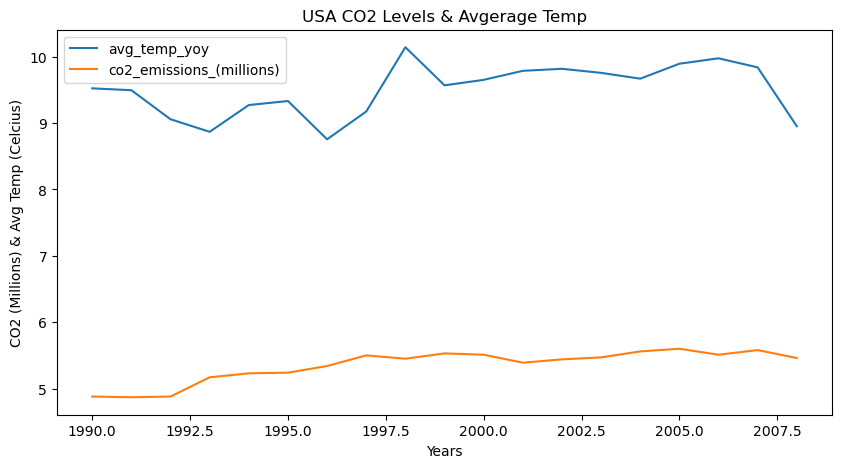

In [111]:
#call plot function for USA
line_plot(usa_co2_temps, 'USA')

*Answer to research question: The plot shows CO2 emissions have noticeably increased since 1990, however average yearly temperature essentially appears flat. At the end of the day, there just isn't enough historic data points for CO2 and temperature changes are miniscule and better measured over centuries, if not millennia. A lot more data (including other greenhouse gases) would be needed to really discern a causal relationship between CO2 emissions and temperature. 

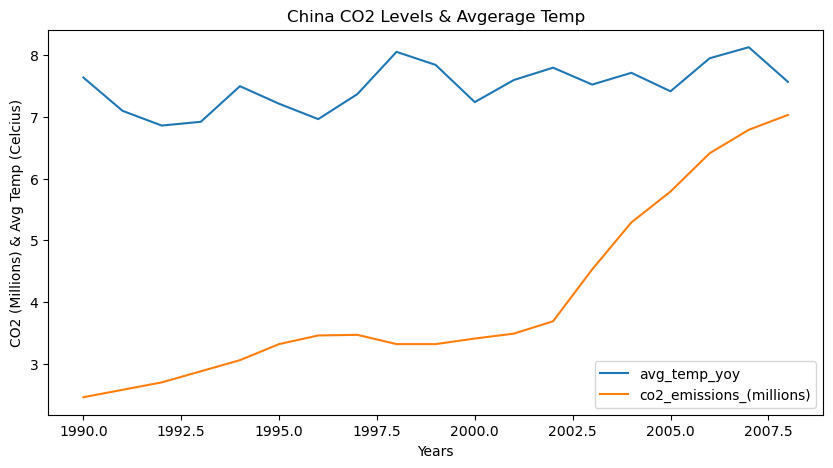

In [112]:
#call plot function for China
line_plot(china_co2_temps, 'China')

*Answer to research question:* This plot really isn't much different from USA other than the massive uptick in CO2 emissions since ~2002. There may be a very slight increase in temperature, however without a regression line plotted, it's hard to say. Again, more data going back much further would benefit these studies. Or, since greenhouse gas data doesn't go back as far as temperature data, more granular data could also potentially provide a better analysis.

### Bonus extra chart - Looking at just temperature for USA

I was curious to see what the temperature has done over a much longer period and decided to do a quick look into the USA.

I started from 1850 rather than 1743 (when the data begins) because when I first plotted the entire temperature dataset, there were strange outliers up until about 1850, so I simply omitted anything prior to 1850.

In [113]:
#subset of USA for temperature
usa_temps_forever = df_temps_cleaning[df_temps_cleaning['country'] == 'United States'].reset_index(drop=True)

In [114]:
#limiting the data from 1850 and beyond
usa_temps_forever = usa_temps_forever[(usa_temps_forever['year'] >= 1850)].reset_index(drop=True)

In [115]:
#grouping by year and averaging
usa_temps_forever_yoy = usa_temps_forever.groupby(['year','country'])['avg_temp'].mean().rename('avg_temp_yoy').to_frame().reset_index()

In [116]:
#view of data
usa_temps_forever_yoy.head()

,year,country,avg_temp_yoy
0,1850,United States,8.248333
1,1851,United States,8.657500
2,1852,United States,8.183083
3,1853,United States,8.459917
4,1854,United States,8.821250


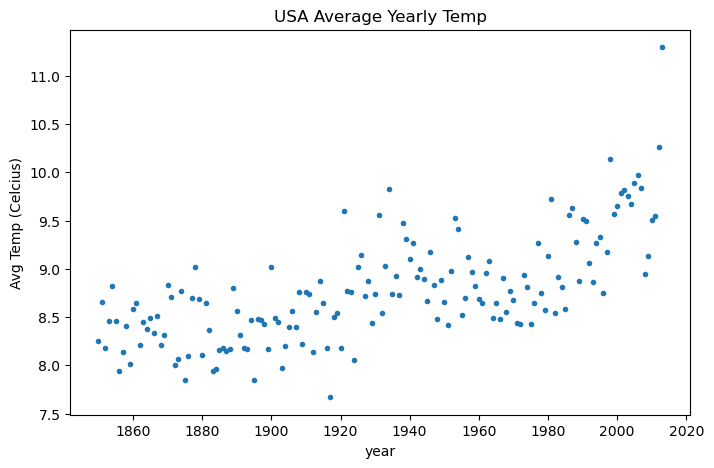

In [117]:
#plotting average yearly temp from 1850
usa_temps_forever_yoy.plot(
    style='.',
    x='year',
    y=['avg_temp_yoy'],
    title='USA Average Yearly Temp',
    legend=False,
    xlabel='year',
    ylabel='Avg Temp (Celcius)',
    rot=0,
    figsize=(8, 5)
);

This plot shows a much clearer, yet gradual, warming of the USA (I'd imagine most countries would show the same). 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* This was an excellent exercise to confirm the notion that data analysts/data scientists spend 60-70% of their time cleaning data! This small project took forever...

That said, if I had more time, I'd spend it looking into better or different data sets. Data with more granular data and with more variety. I would have also liked to plot USA and China on the same chart. But, as I mentioned previously, I need to learn visualization much better. Finally, having more time, I'd look at other countries and other possible causal/correlated relationships between greenhouse gases and global temperature.